Dataset is obtained from [10 food classes all data](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip)

```
# Unzip the file 
import zipfile

zip_ref = zipfile.ZipFile('../10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

```

In [1]:
from helper_fun import *

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Using tensorflow version: 2.5.0-rc2


### Visualize some random images

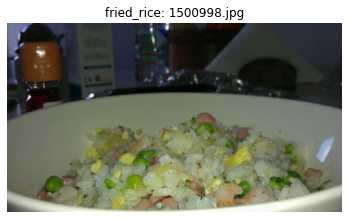

Image shape: (289, 512, 3)


In [11]:
view_random_image('10_food_classes_all_data/train/')

In [12]:
# set random seed
tf.random.set_seed(42)

# train and test dir
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

# Build data generator for the images
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

IMG_SIZE = (244, 244)

# Flow data from directory
train_data = train_datagen.flow_from_directory(directory= train_dir, 
                                               target_size= IMG_SIZE, 
                                               batch_size= 32,
                                               class_mode= 'categorical',
                                               seed = 42,
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(directory= test_dir, 
                                             target_size= IMG_SIZE, 
                                             batch_size= 32,
                                             class_mode= 'categorical',
                                             seed = 42,
                                             shuffle = True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a baseline model

In [18]:
# Set random seed
tf.random.set_seed(42)

# Build CNN model
model_1 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (244, 244, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# Compile the model
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = Adam(),
               metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 270s 1s/step - loss: 2.1602 - accuracy: 0.2101 - val_loss: 1.9864 - val_accuracy: 0.2788
Epoch 2/5
235/235 [==============================] - 267s 1s/step - loss: 1.8823 - accuracy: 0.3411 - val_loss: 1.8922 - val_accuracy: 0.3352
Epoch 3/5
235/235 [==============================] - 268s 1s/step - loss: 1.3711 - accuracy: 0.5401 - val_loss: 2.0397 - val_accuracy: 0.3248
Epoch 4/5
235/235 [==============================] - 253s 1s/step - loss: 0.6429 - accuracy: 0.7932 - val_loss: 2.9246 - val_accuracy: 0.2732
Epoch 5/5
235/235 [==============================] - 250s 1s/step - loss: 0.2160 - accuracy: 0.9345 - val_loss: 4.4080 - val_accuracy: 0.2668


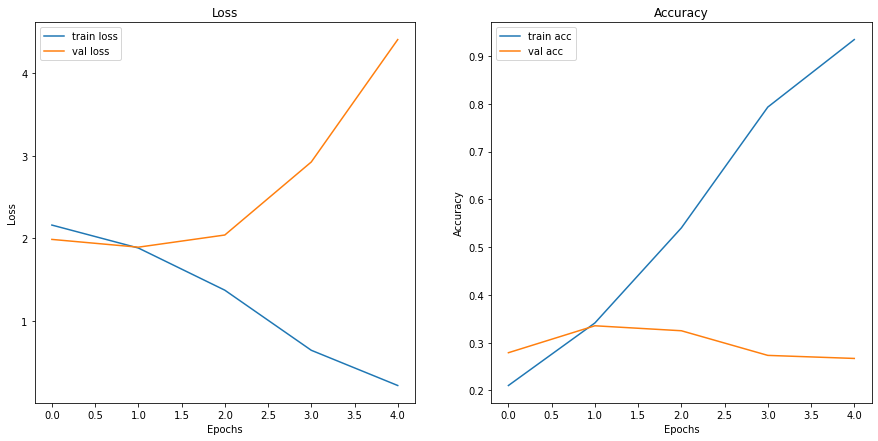

In [19]:
plot_history(history_1)

### Adjust model hyper parameters to reduce overfitting

In [23]:
# Set random seed
tf.random.set_seed(42)

# Build CNN model
model_2 = Sequential([
    Conv2D(filters = 10, kernel_size = 3, activation = 'relu', input_shape = (244, 244, 3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
#     Conv2D(10, 3, activation = 'relu'),
#     Conv2D(10, 3, activation = 'relu'),
#     MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

# Compile the model
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
               optimizer = Adam(learning_rate= 0.005),
               metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= test_data,
                        validation_steps= len(test_data))

Epoch 1/5
 56/235 [======>.......................] - ETA: 2:26 - loss: 3.0899 - accuracy: 0.0954

KeyboardInterrupt: 

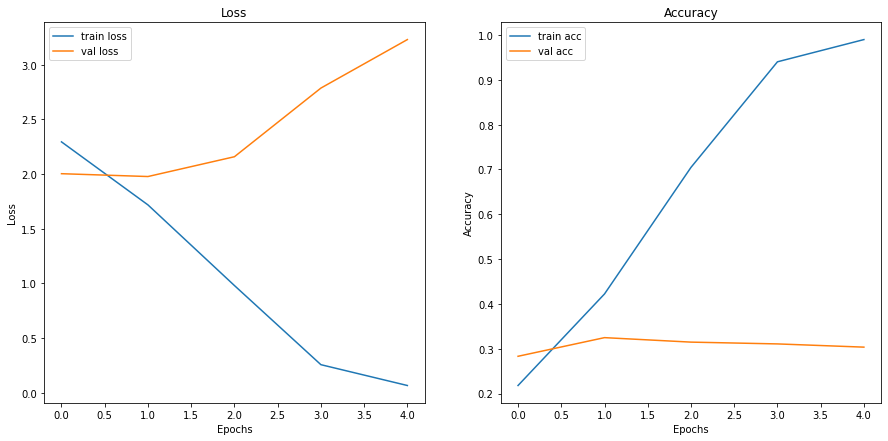

In [22]:
plot_history(history_2)